In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('C:\\Users\\abish\\Downloads\\SofifaAll\\FIFA22_official_data_updated.csv')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16710 non-null  object 
 1   Age                       16710 non-null  int64  
 2   Photo                     16710 non-null  object 
 3   Nationality               16710 non-null  object 
 4   Flag                      16710 non-null  object 
 5   Overall                   16710 non-null  int64  
 6   Potential                 16710 non-null  int64  
 7   Club                      16446 non-null  object 
 8   Club Logo                 16710 non-null  object 
 9   Special                   16710 non-null  int64  
 10  Preferred Foot            16710 non-null  object 
 11  International Reputation  16710 non-null  float64
 12  Weak Foot                 16710 non-null  float64
 13  Skill Moves               16710 non-null  float64
 14  Work R

In [3]:
 
df.rename(columns={'new_values_series': 'Transfer Cost'}, inplace=True)
#new_values_series
print(df.isnull().sum())
df.drop(['Real Face','Flag','Special', 'Release Clause','Crossing','Volleys','Agility','Reactions','Balance','Jumping','Stamina','Aggression','Interceptions','Penalties','Composure','Marking'
         ,'Positioning','Vision','Strength','Jersey Number','Club Logo','Body Type','Loaned From','GKHandling',	'GKKicking',	'GKPositioning',	'GKReflexes' ,'Skill Moves','GKDiving','new_wages_series'
        
        
        
        
        
        
        
        ],axis=1,inplace=True)
df = df.drop(['Height','Weight','FKAccuracy'],axis=1)
df = df[df['Transfer Cost']!=0]



Name                     0
Age                      0
Photo                    0
Nationality              0
Flag                     0
                      ... 
Release Clause        1749
DefensiveAwareness     892
new_values               0
Transfer Cost            0
new_wages_series         0
Length: 65, dtype: int64


In [4]:
print(df.describe())
import pandas as pd
 
df.rename(columns={'new_values_series': 'Transfer Cost'}, inplace=True)
#new_values_series

                Age       Overall     Potential  International Reputation  \
count  16366.000000  16366.000000  16366.000000              16366.000000   
mean      25.633753     67.595197     72.573139                  1.162960   
std        4.992195      6.438869      5.657113                  0.471646   
min       16.000000     44.000000     46.000000                  1.000000   
25%       22.000000     63.000000     69.000000                  1.000000   
50%       25.000000     68.000000     72.000000                  1.000000   
75%       29.000000     72.000000     76.000000                  1.000000   
max       45.000000     93.000000     95.000000                  5.000000   

          Weak Foot     Finishing  HeadingAccuracy  ShortPassing  \
count  16366.000000  16366.000000     16366.000000  16366.000000   
mean       3.005438     48.705792        54.067762     61.295735   
std        0.680868     19.361280        16.956417     13.619796   
min        1.000000      3.000000 

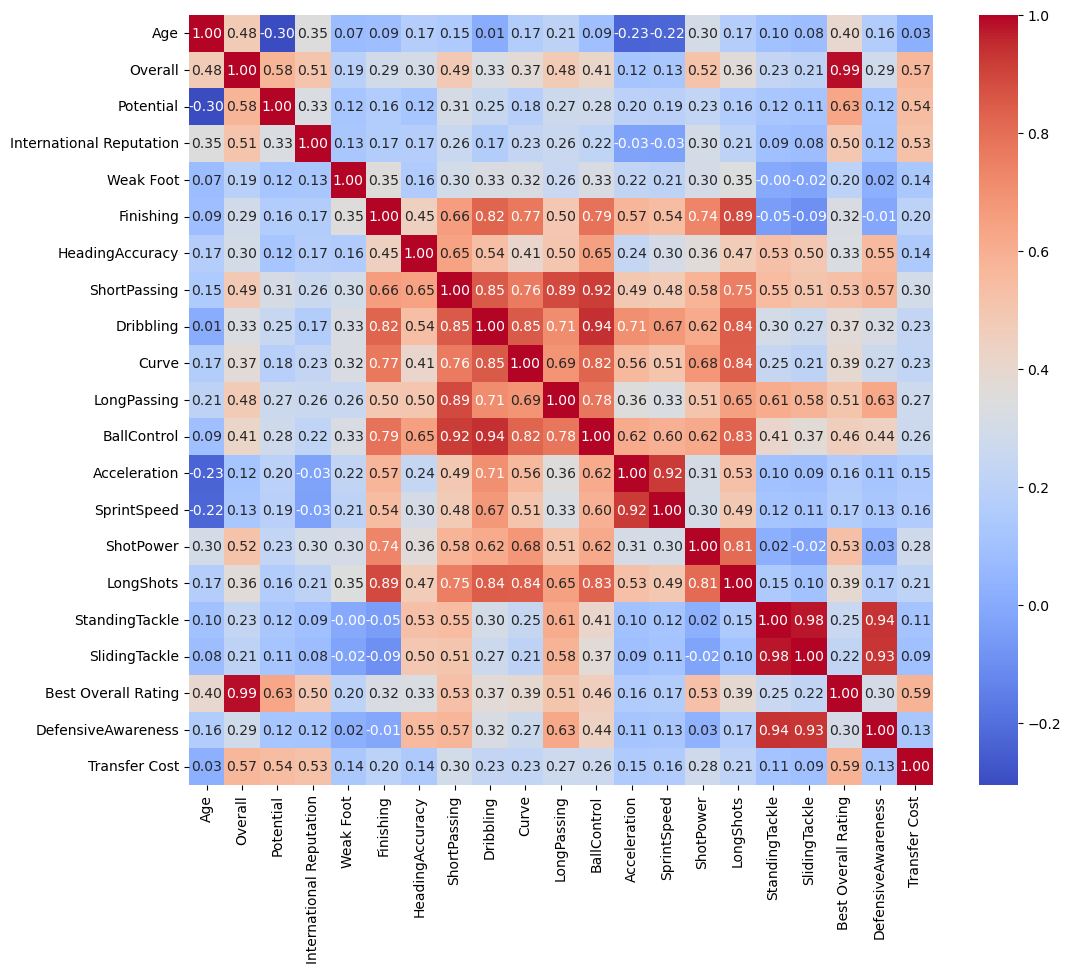

In [5]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


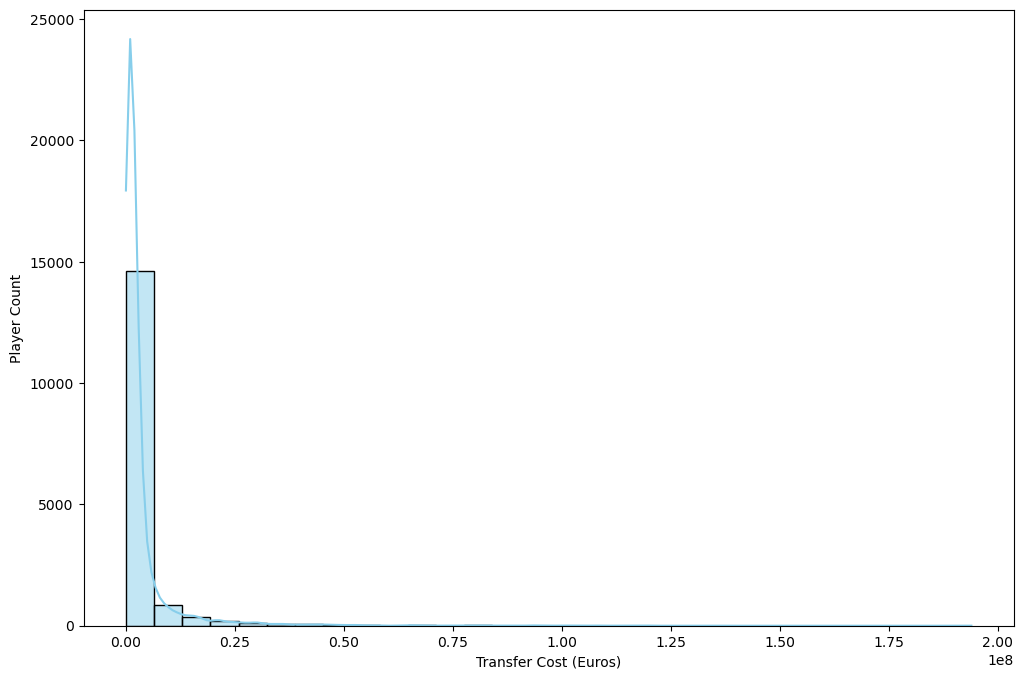

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

 
plt.figure(figsize=(12, 8))
 
sns.histplot(df['Transfer Cost'], bins=30, kde=True, color='skyblue')
plt.xlabel('Transfer Cost (Euros)')  # Add x-axis label
plt.ylabel('Player Count')  # Add x-axis label
plt.title('')  # Remove the title

plt.show()


C:\Users\abish\AppData\Local\Temp\ipykernel_16216\3290794034.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_nationalities['Count'] = df_top_nationalities.groupby('Nationality')['Nationality'].transform('count')


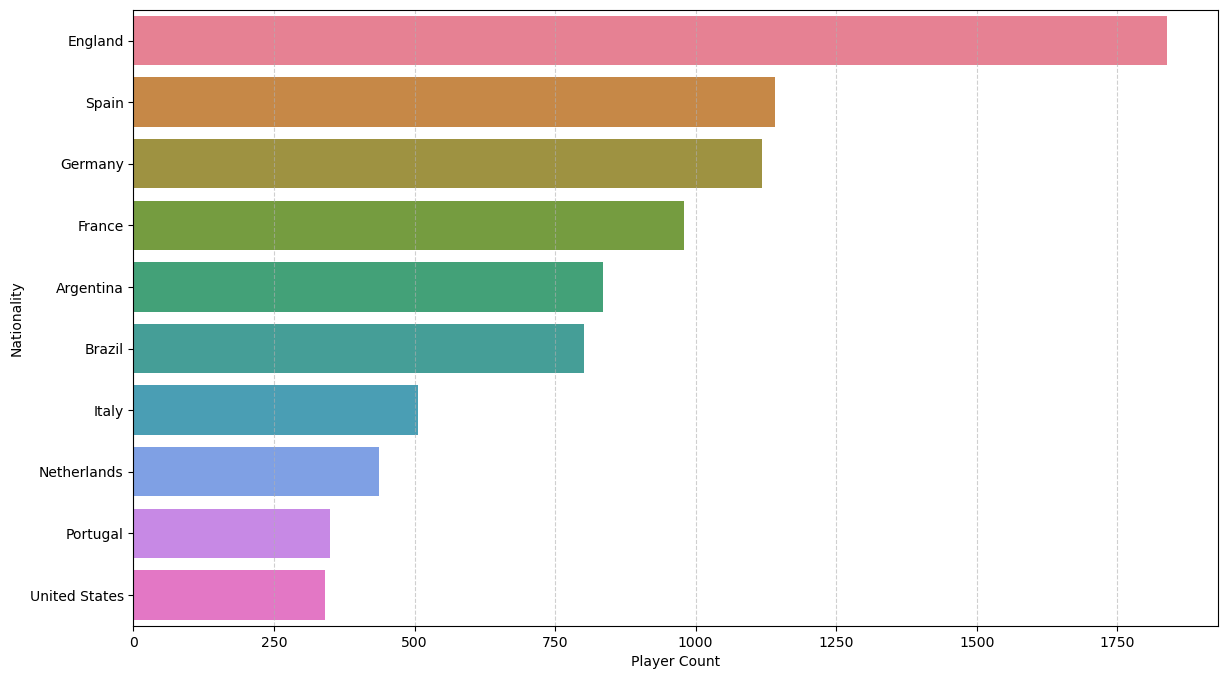

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
top_nationalities = df['Nationality'].value_counts().nlargest(10).index
 
df_top_nationalities = df[df['Nationality'].isin(top_nationalities)]

 
df_top_nationalities['Count'] = df_top_nationalities.groupby('Nationality')['Nationality'].transform('count')
 
df_top_nationalities = df_top_nationalities.sort_values(by='Count', ascending=False)
 
colors = sns.color_palette('husl', 10)   

 
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Nationality', data=df_top_nationalities, palette=colors)

 
plt.xlabel('Player Count')
plt.ylabel('Nationality')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


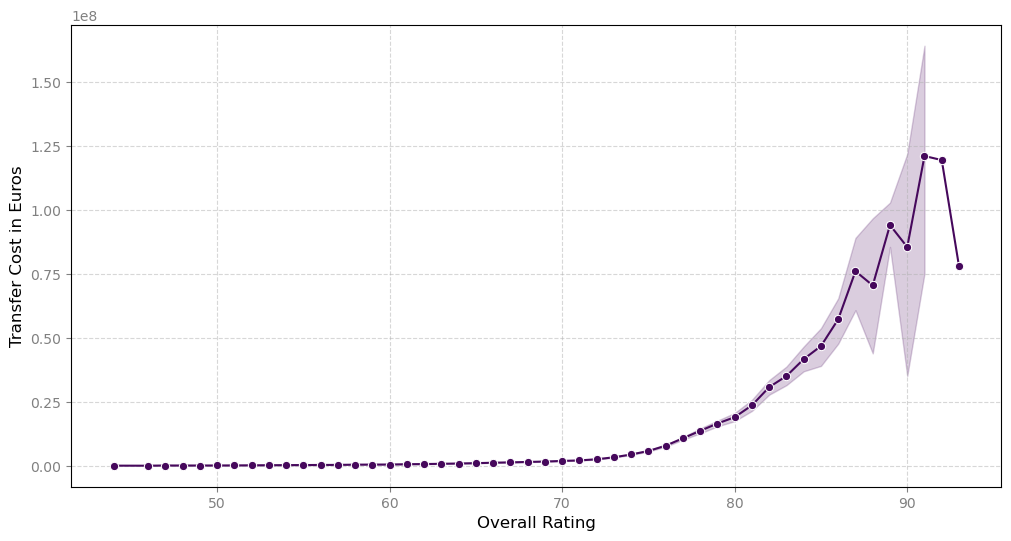

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(12, 6))

 
colors = sns.color_palette('viridis', n_colors=len(df['Overall'].unique()))


sns.lineplot(x='Overall', y='Transfer Cost', data=df, marker='o', color=colors[0])

 
plt.grid(axis='both', linestyle='--', alpha=0.5)

# Customize the appearance
#plt.title('Line Plot of Overall Rating vs. Transfer Cost', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Transfer Cost in Euros', fontsize=12)

# Add a legend for clarity
#plt.legend(['Transfer Cost'], loc='upper right', fontsize=10)

# Customize the color of the axes
plt.tick_params(axis='both', which='both', colors='gray')

plt.show()


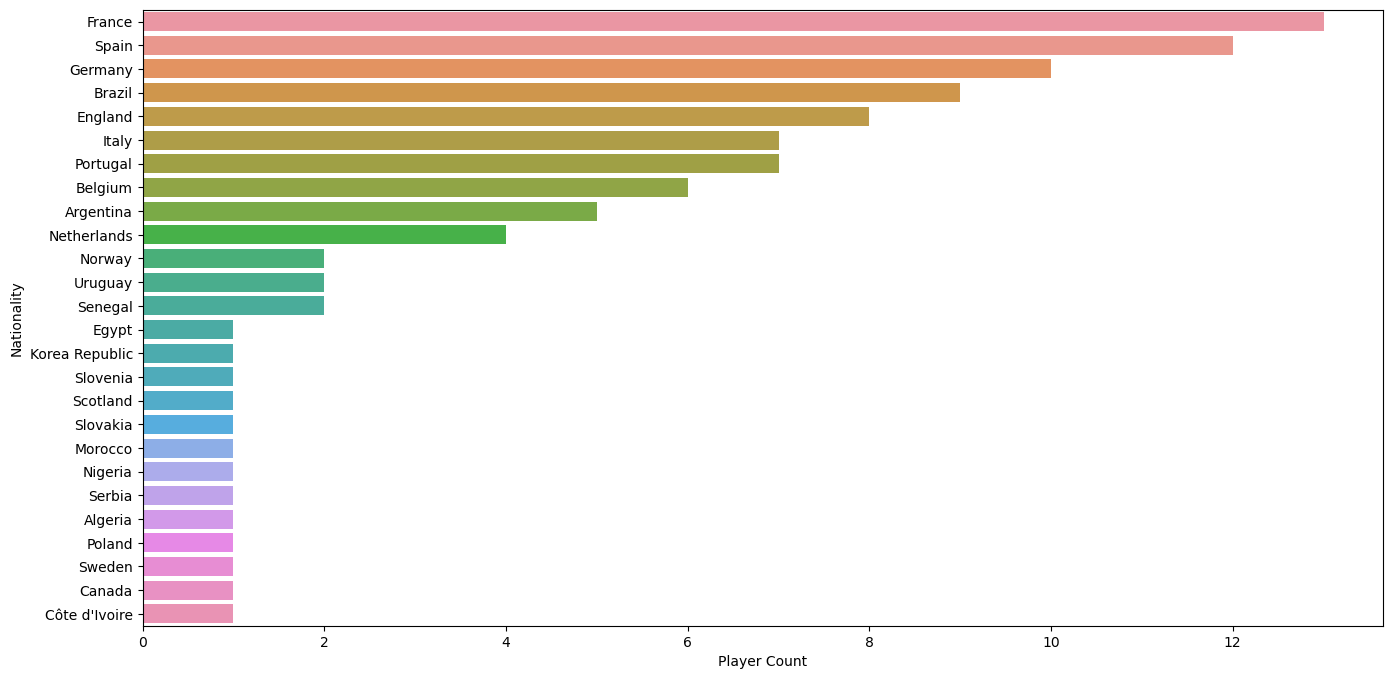

In [9]:
top_100_players = df.sort_values(by='Transfer Cost', ascending=False).head(100)
player_count_by_country = top_100_players['Nationality'].value_counts().reset_index()
player_count_by_country.columns = ['Nationality', 'Player Count']
plt.figure(figsize=(16, 8))
sns.barplot(x='Player Count', y='Nationality', data=player_count_by_country)
#plt.title('Player Count by Nationality (Top 100 Players)')
plt.xlabel('Player Count')
plt.ylabel('Nationality')
plt.show()


In [10]:
top_100_players

Name  Age                                             Photo  \
82        K. Mbappé   22  https://cdn.sofifa.com/players/231/747/22_60.png   
251      E. Haaland   20  https://cdn.sofifa.com/players/239/085/22_60.png   
39          H. Kane   27  https://cdn.sofifa.com/players/202/126/22_60.png   
64        Neymar Jr   29  https://cdn.sofifa.com/players/190/871/22_60.png   
3      K. De Bruyne   30  https://cdn.sofifa.com/players/192/985/22_60.png   
...             ...  ...                                               ...   
14           Merino   25  https://cdn.sofifa.com/players/225/193/22_60.png   
51        F. Kessié   24  https://cdn.sofifa.com/players/230/938/22_60.png   
76      A. Di María   33  https://cdn.sofifa.com/players/183/898/22_60.png   
13755    M. Maignan   25  https://cdn.sofifa.com/players/215/698/22_60.png   
295     M. Ødegaard   22  https://cdn.sofifa.com/players/222/665/22_60.png   

         Nationality  Overall  Potential                 Club Preferred Foot  \
82            France       91         95  Paris Saint-Germain          Right   
251           Norway       88         93    Borussia Dortmund           Left   
39           England       90         90    Tottenham Hotspur          Right   
64            Brazil       91         91  Paris Saint-Germain          Right   
3            Belgium       91         91      Manchester City          Right   
...              ...      ...        ...                  ...            ...   
14             Spain       83         87        Real Sociedad           Left   
51     Côte d'Ivoire       84         86             AC Milan          Right   
76         Argentina       87         87  Paris Saint-Germain           Left   
13755         France       84         89             AC Milan          Right   
295           Norway       82         88              Arsenal           Left   

       International Reputation  Weak Foot  ... SprintSpeed ShotPower  \
82                          4.0        4.0  ...        97.0      86.0   
251                         4.0        3.0  ...        94.0      94.0   
39                          4.0        5.0  ...        74.0      91.0   
64                          5.0        5.0  ...        89.0      80.0   
3                           4.0        5.0  ...        76.0      91.0   
...                         ...        ...  ...         ...       ...   
14                          1.0        3.0  ...        75.0      84.0   
51                          3.0        4.0  ...        79.0      84.0   
76                          4.0        2.0  ...        83.0      83.0   
13755                       2.0        4.0  ...        51.0      64.0   
295                         3.0        2.0  ...        75.0      76.0   

      LongShots StandingTackle  SlidingTackle  Best Position  \
82         82.0           34.0           32.0             ST   
251        87.0           43.0           30.0             ST   
39         86.0           36.0           38.0             ST   
64         81.0           32.0           29.0             LW   
3          91.0           65.0           53.0             CM   
...         ...            ...            ...            ...   
14         78.0           84.0           76.0             CM   
51         78.0           84.0           78.0            CDM   
76         86.0           55.0           52.0             RW   
13755      20.0           16.0           19.0             GK   
295        77.0           49.0           51.0            CAM   

       Best Overall Rating  DefensiveAwareness  new_values  Transfer Cost  
82                    92.0                26.0        194M    194000000.0  
251                   90.0                44.0      137.5M    137500000.0  
39                    90.0                50.0      129.5M    129500000.0  
64                    91.0                35.0        129M    129000000.0  
3                     91.0                68.0      125.5M    125500000.0  
...            

In [87]:
import plotly.express as px
import pandas as pd
 
top_15_clubs = df.groupby('Club')['Transfer Cost'].mean().reset_index()
 
top_15_clubs = top_15_clubs.sort_values(by='Transfer Cost', ascending=False).head(15)

fig = px.bar(top_15_clubs, x='Club', y='Transfer Cost', 
            #  title='Average Transfer Values by Club in € (Top 15)',
             labels={'Transfer Cost': 'Average Transfer Value'},
             height=600)

# Customize layout
fig.update_layout(xaxis_title='Club', yaxis_title='Average Transfer Value in Euros', xaxis_tickangle=-45)

# Add values on top of bars for better precision
for index, row in top_15_clubs.iterrows():
    fig.add_annotation(
        x=row['Club'],
        y=row['Transfer Cost'],
        text=f'€{row["Transfer Cost"]:.2f}',  # Added Euro symbol
        showarrow=False,
        font=dict(color='black', size=10),
        yshift=10
    )

# Show the interactive plot
fig.show()


In [88]:
import plotly.express as px
import pandas as pd
 
top_15_clubs = df.groupby('Club')['Transfer Cost'].sum().sort_values(ascending=False).head(15).reset_index()

fig = px.bar(top_15_clubs,
             x='Club', y='Transfer Cost', 
             #title='All-Time Transfer Spending by Club (Top 15)',
             labels={'Transfer Cost': 'Total Transfer Spending'},
             height=600)

# Customize layout
fig.update_layout(xaxis_title='Club', yaxis_title='Total Transfer Spending in Euros', xaxis_tickangle=-45)
# Add values on top of bars for better precision
for index, row in top_15_clubs.iterrows():
    fig.add_annotation(
        x=row['Club'],
        y=row['Transfer Cost'],
        text=f'€{row["Transfer Cost"]:.2f}',  # Added Euro symbol
        showarrow=False,
        font=dict(color='black', size=10),
        yshift=20  # 
    )
 
fig.show()


In [89]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame and 'Transfer Cost' is the column you want to plot
top_15_avg = df.groupby('Club')['Transfer Cost'].mean().sort_values(ascending=False).head(15).reset_index()

# Assuming df is your DataFrame and 'Transfer Cost' is the column you want to sum
top_15_sum = df.groupby('Club')['Transfer Cost'].sum().sort_values(ascending=False).head(15).reset_index()

fig = px.bar(top_15_avg, x='Club', y='Transfer Cost', color_discrete_sequence=['lightblue'],
             title='Comparison of Average Transfer Values and All-Time Transfer Spending (Top 15)',
             labels={'Transfer Cost': 'Average Transfer Value'},
             height=600)

# Add a second bar for all-time transfer spending
fig.add_bar(x=top_15_sum['Club'], y=top_15_sum['Transfer Cost'], name='All-Time Transfer Spending', 
            marker_color='orange')

# Customize layout
fig.update_layout(xaxis_title='Club', yaxis_title='Value', xaxis_tickangle=-45)

# Show the interactive plot
fig.show()


In [90]:
df.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot', 'Work Rate',
       'Position', 'Joined', 'Contract Valid Until', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'Curve', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'ShotPower', 'LongShots',
       'StandingTackle', 'SlidingTackle', 'Best Position',
       'Best Overall Rating', 'DefensiveAwareness', 'new_values',
       'Transfer Cost'],
      dtype='object')

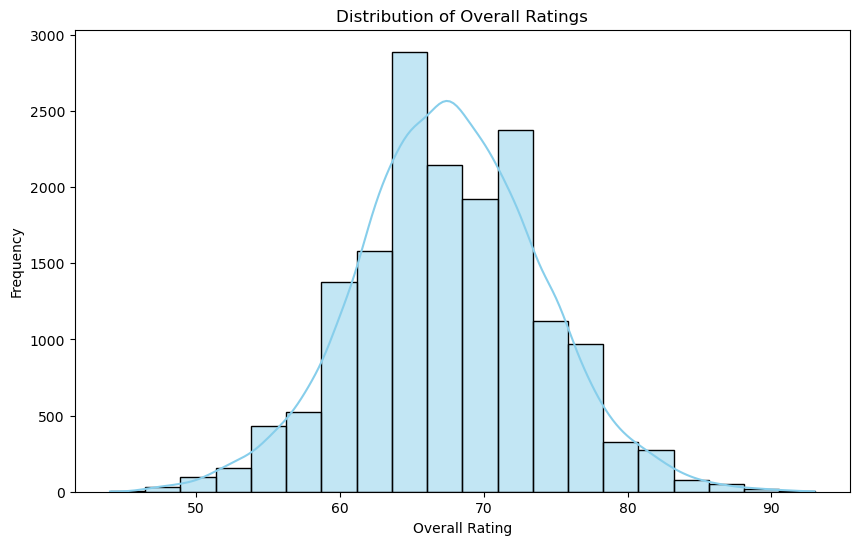

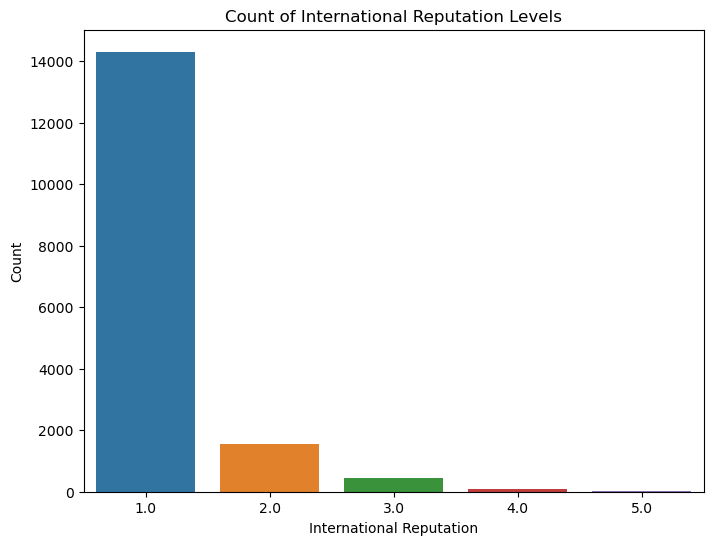

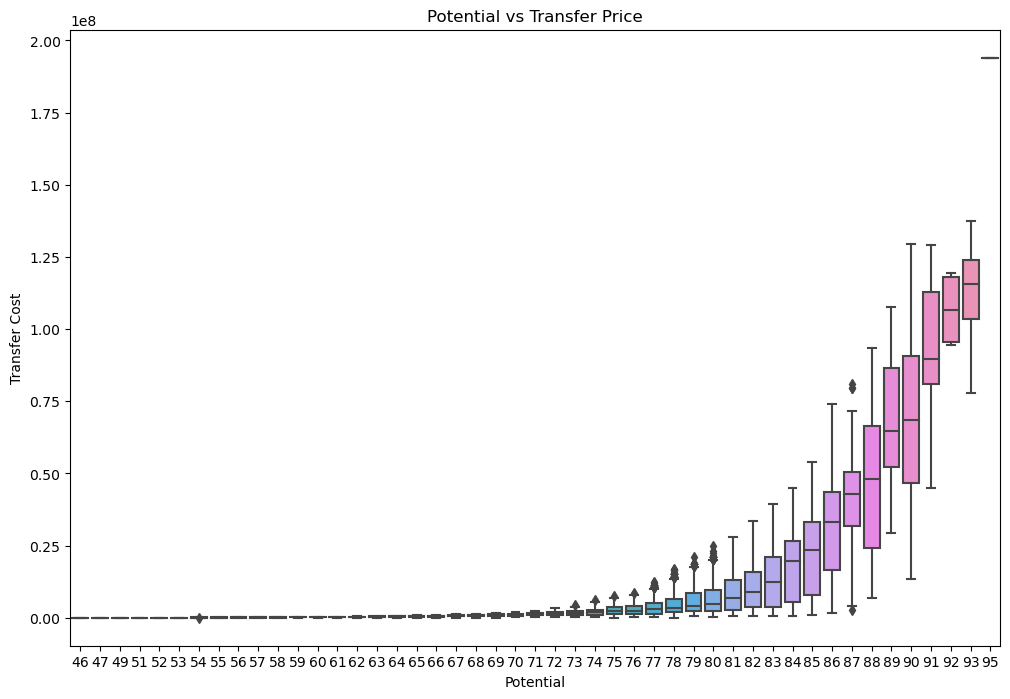

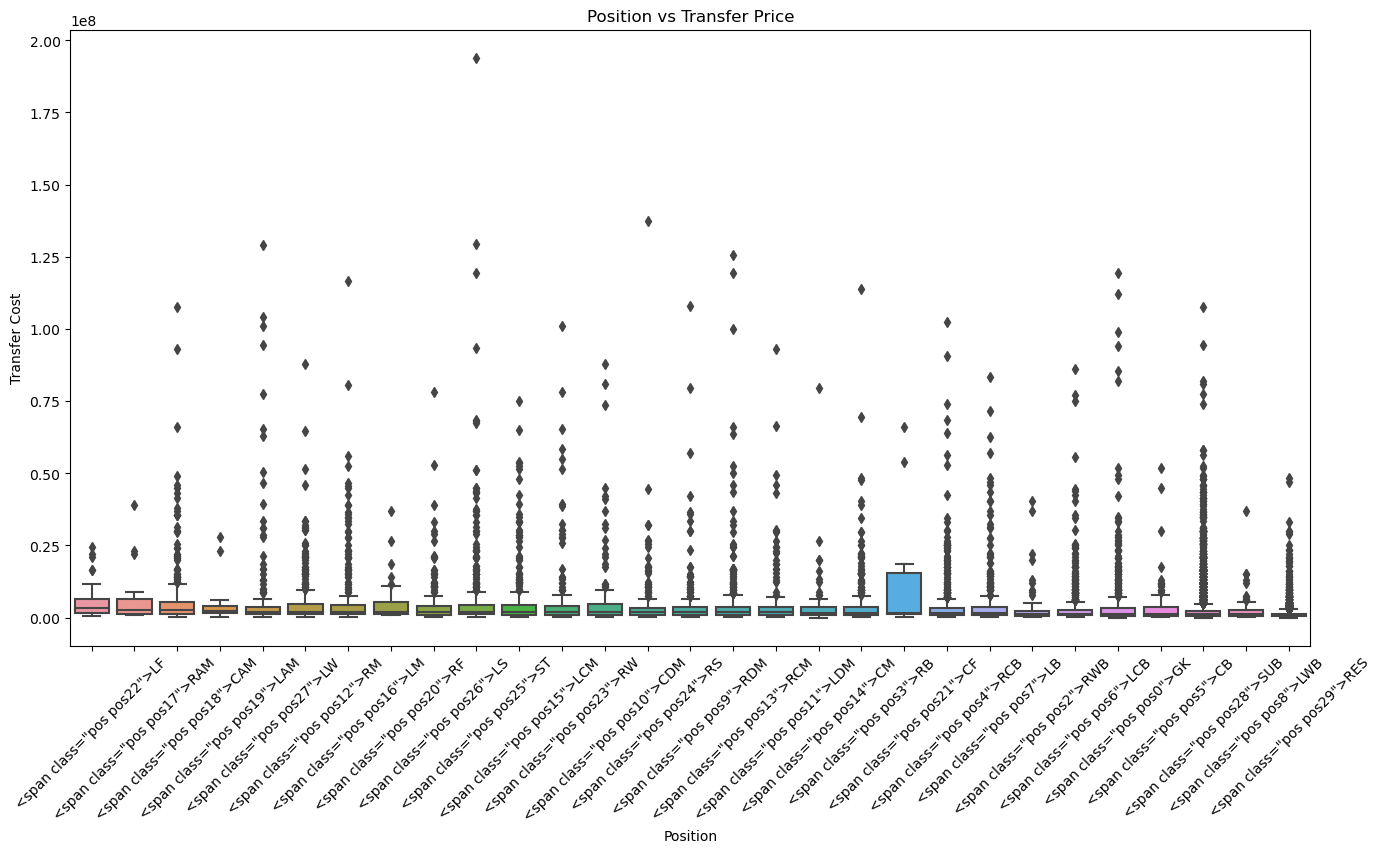

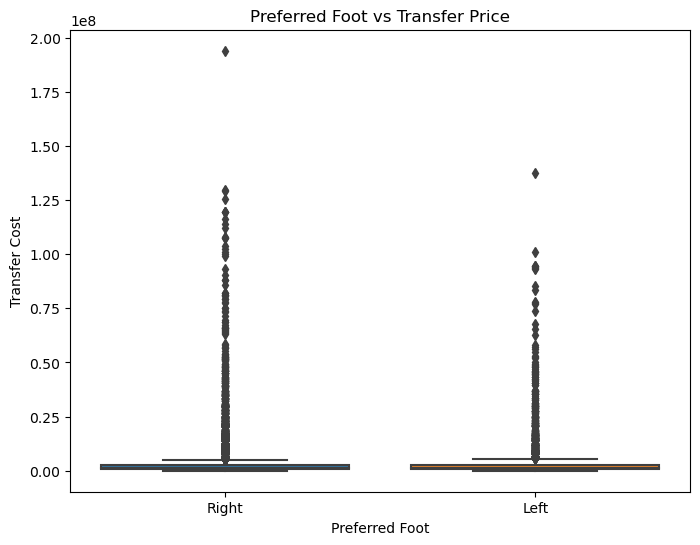

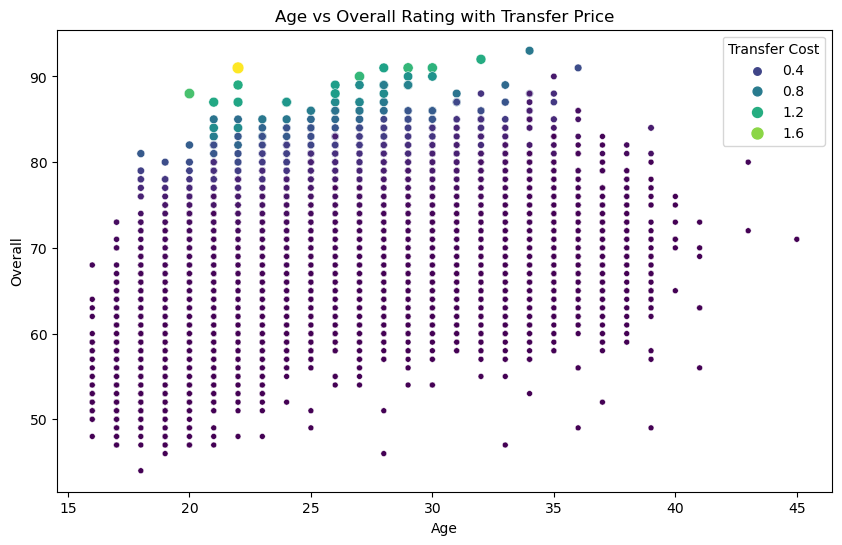

In [91]:
# Distribution of 'Overall' ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

# Bar plot for 'International Reputation'
plt.figure(figsize=(8, 6))
sns.countplot(x='International Reputation', data=df)
plt.title('Count of International Reputation Levels')
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.show()

# Boxplot for 'Potential' vs 'Transfer Cost'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Potential', y='Transfer Cost', data=df)
plt.title('Potential vs Transfer Price')
plt.show()

# Boxplot for 'Position' vs 'Transfer Cost'
plt.figure(figsize=(16, 8))
sns.boxplot(x='Position', y='Transfer Cost', data=df, order=df.groupby('Position')['Transfer Cost'].median().sort_values(ascending=False).index)
plt.title('Position vs Transfer Price')
plt.xticks(rotation=45)
plt.show()

# Boxplot for 'Preferred Foot' vs 'Transfer Cost'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Preferred Foot', y='Transfer Cost', data=df)
plt.title('Preferred Foot vs Transfer Price')
plt.show()

# Scatter plot for 'Age' vs 'Overall'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Overall', data=df, hue='Transfer Cost', palette='viridis', size='Transfer Cost')
plt.title('Age vs Overall Rating with Transfer Price')
plt.show()


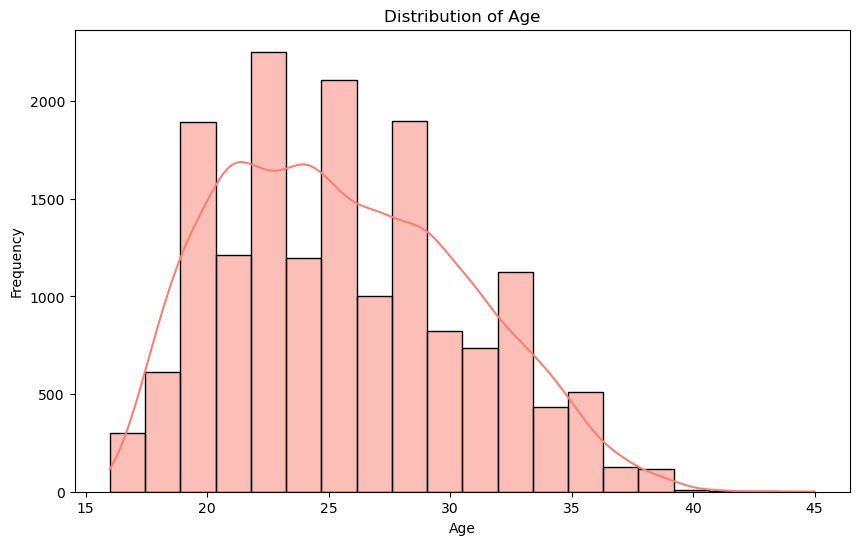

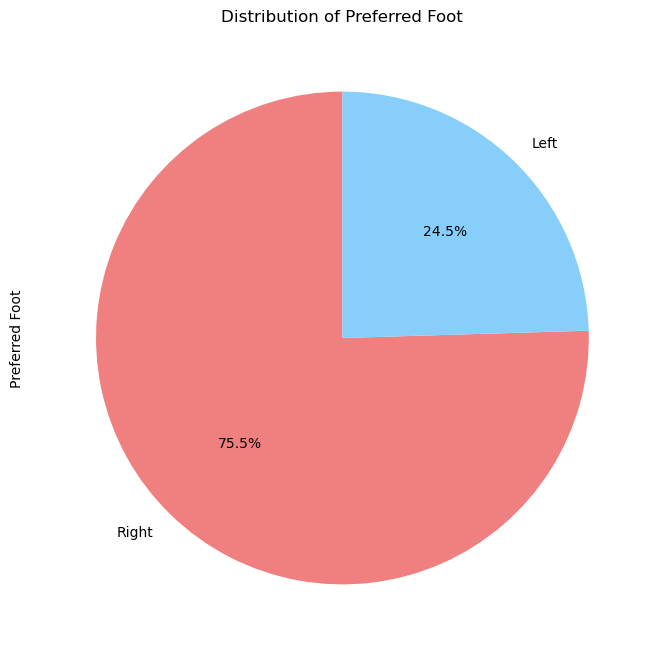

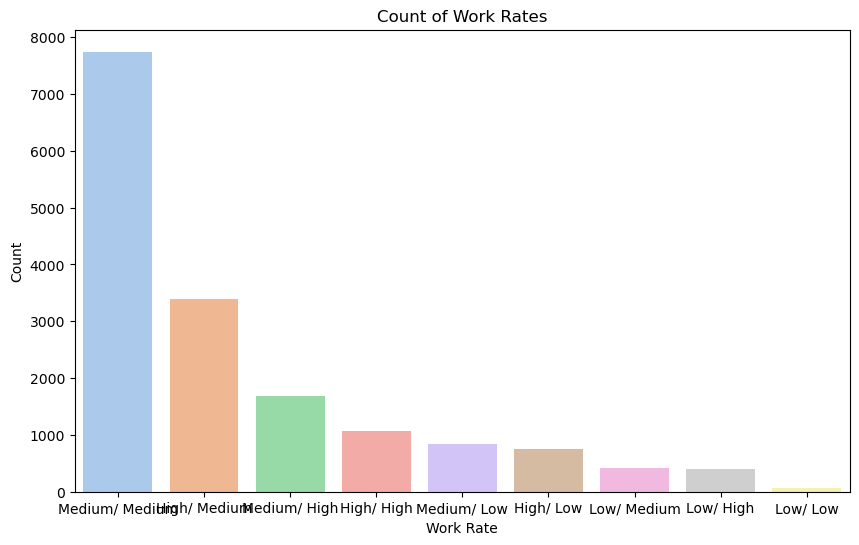

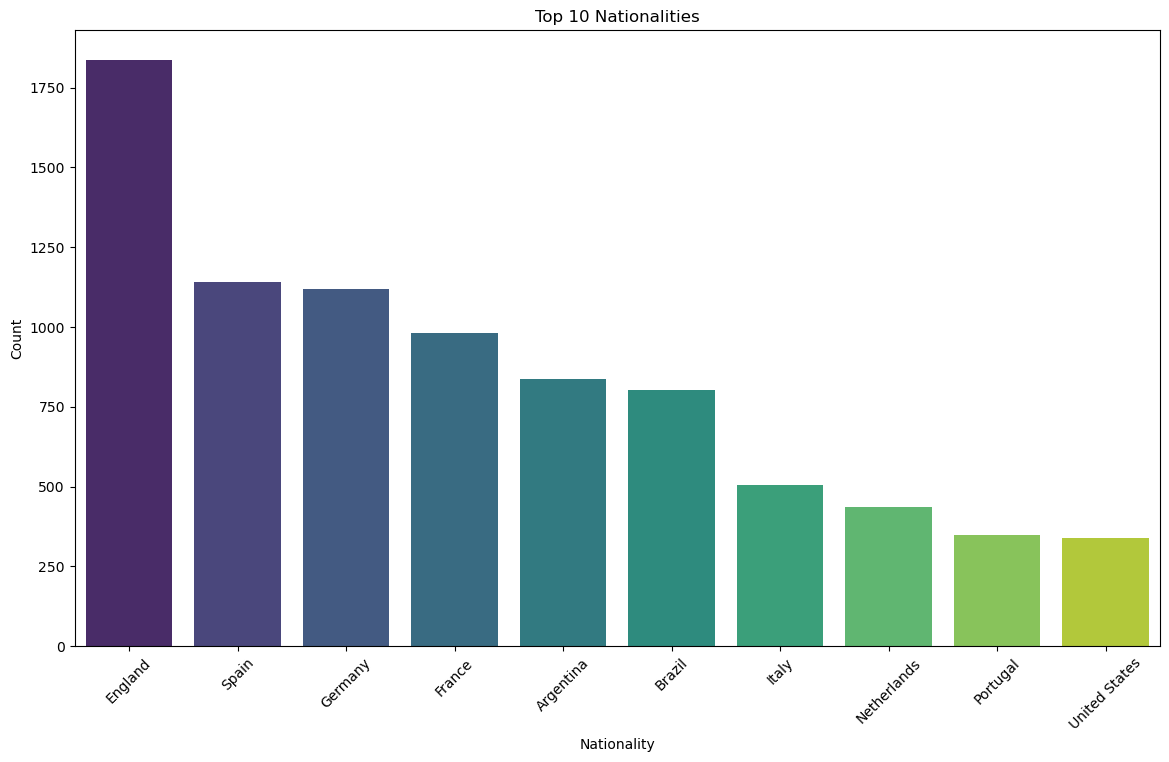

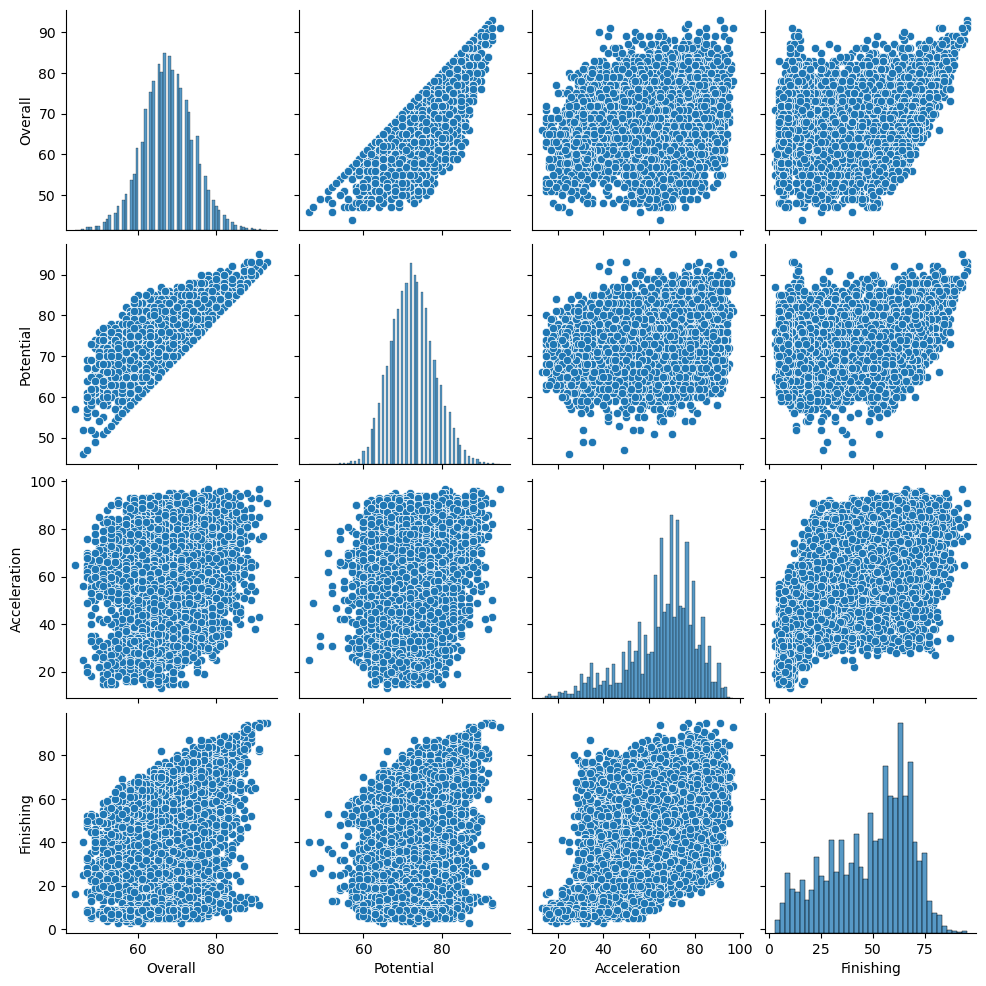

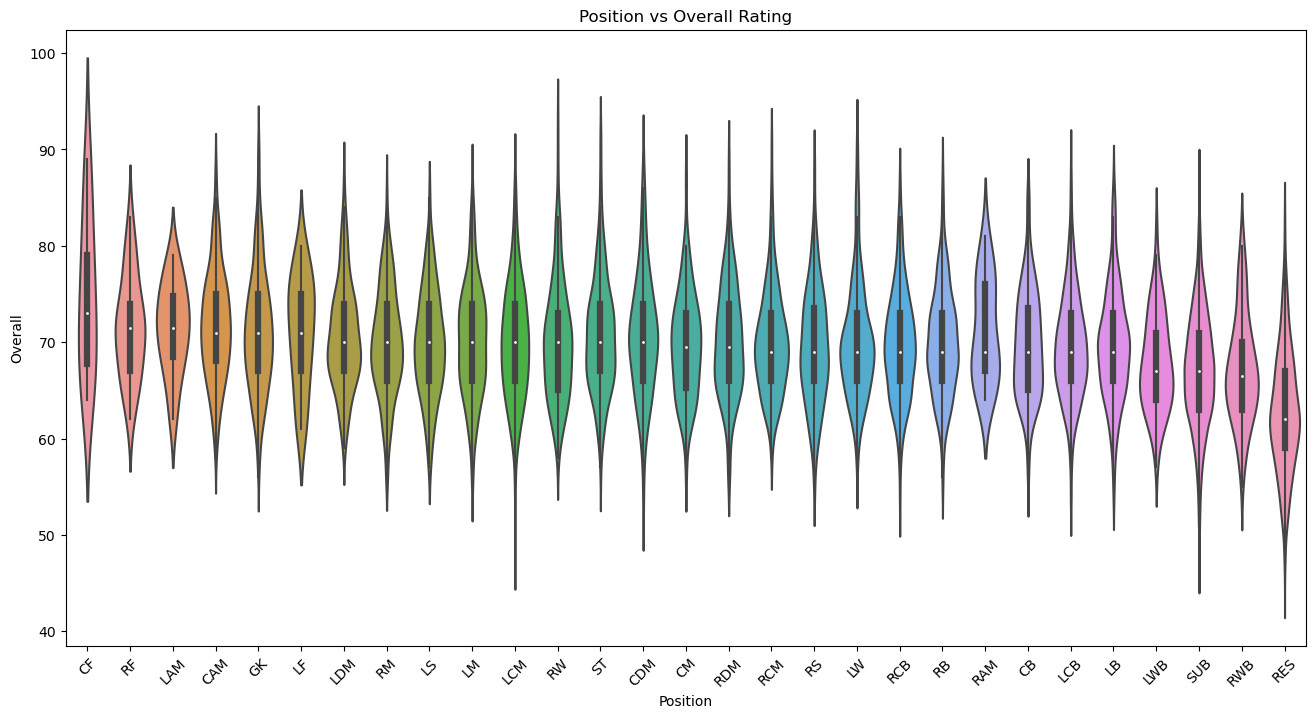

In [11]:
# Distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Pie chart for the distribution of 'Preferred Foot'
plt.figure(figsize=(8, 8))
df['Preferred Foot'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Preferred Foot')
plt.show()

# Bar plot for 'Work Rate'
plt.figure(figsize=(10, 6))
sns.countplot(x='Work Rate', data=df, order=df['Work Rate'].value_counts().index, palette='pastel')
plt.title('Count of Work Rates')
plt.xlabel('Work Rate')
plt.ylabel('Count')
plt.show()

# Bar plot for 'Nationality' (Top 10)
plt.figure(figsize=(14, 8))
top_nationalities = df['Nationality'].value_counts().nlargest(10)
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette='viridis')
plt.title('Top 10 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pairplot for selected features
selected_features = ['Overall', 'Potential', 'Acceleration', 'Finishing']
sns.pairplot(df[selected_features])
plt.show()

# Remove HTML tags from 'Position' column
df['Position'] = df['Position'].str.replace(r'<.*?>', '', regex=True)

# Violin plot for 'Position' vs 'Overall' after removing HTML tags
plt.figure(figsize=(16, 8))
sns.violinplot(x='Position', y='Overall', data=df, order=df.groupby('Position')['Overall'].median().sort_values(ascending=False).index)
plt.title('Position vs Overall Rating')
plt.xticks(rotation=45)
plt.show()


In [94]:
import plotly.express as px

fig = px.bar(df, x='Preferred Foot', y='Transfer Cost', color='Preferred Foot',
             labels={'Transfer Cost': 'Average Transfer Cost'},
             title='Average Transfer Cost by Preferred Foot',
             hover_data=['Name', 'Overall', 'Age'])

fig.update_layout(xaxis_title='Preferred Foot', yaxis_title='Average Transfer Cost')

fig.show()


In [ ]:
import plotly.graph_objects as go

# Calculate average transfer cost for each preferred foot
average_transfer_cost = df.groupby('Preferred Foot')['Transfer Cost'].mean().reset_index()

# Create a bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=average_transfer_cost['Preferred Foot'],
    y=average_transfer_cost['Transfer Cost'],
    hovertemplate='Average Transfer Cost: €%{y:,.2f}<extra></extra>',
    marker_color=['#1f77b4', '#ff7f0e'],  # Blue for left foot, orange for right foot
))

# Customize layout
fig.update_layout(
    title='Average Transfer Cost by Preferred Foot',
    xaxis_title='Preferred Foot',
    yaxis_title='Average Transfer Cost',
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
position_avg_prices = df.groupby('Position')['Transfer Cost'].mean().reset_index()

# Sort the table by average transfer price in descending order
position_avg_prices = position_avg_prices.sort_values(by='Transfer Cost', ascending=False)

# Display the table
print(position_avg_prices)


   Position  new_values_series
3        CF       1.512500e+07
14       LW       7.716087e+06
16      RAM       7.267647e+06
0       CAM       6.721685e+06
25       RW       6.493931e+06
27       ST       6.434004e+06
2       CDM       6.320195e+06
11       LF       6.123276e+06
22       RF       5.812500e+06
12       LM       5.786974e+06
10      LDM       5.333089e+06
19      RCM       5.322339e+06
20      RDM       5.174625e+06
23       RM       5.165692e+06
9       LCM       5.113449e+06
5        GK       4.877648e+06
7        LB       4.738666e+06
6       LAM       4.640909e+06
13       LS       4.550117e+06
4        CM       4.469676e+06
24       RS       4.406698e+06
18      RCB       4.398763e+06
17       RB       4.297914e+06
8       LCB       3.785804e+06
1        CB       3.473673e+06
26      RWB       3.187394e+06
15      LWB       2.687011e+06
28      SUB       2.638868e+06
21      RES       1.360782e+06


In [ ]:
from scipy.stats import mannwhitneyu

# Assuming 'df' is your DataFrame
left_foot_prices = df[df['Preferred Foot'] == 'Left']['Transfer Cost']
right_foot_prices = df[df['Preferred Foot'] == 'Right']['Transfer Cost']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(left_foot_prices, right_foot_prices, alternative='two-sided')

# Display the results
print(f'Mann-Whitney U Statistic: {statistic}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between left and right foot transfer prices.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between left and right foot transfer prices.")


Mann-Whitney U Statistic: 25869867.0
P-Value: 3.304050487227919e-05
Reject the null hypothesis: There is a significant difference between left and right foot transfer prices.


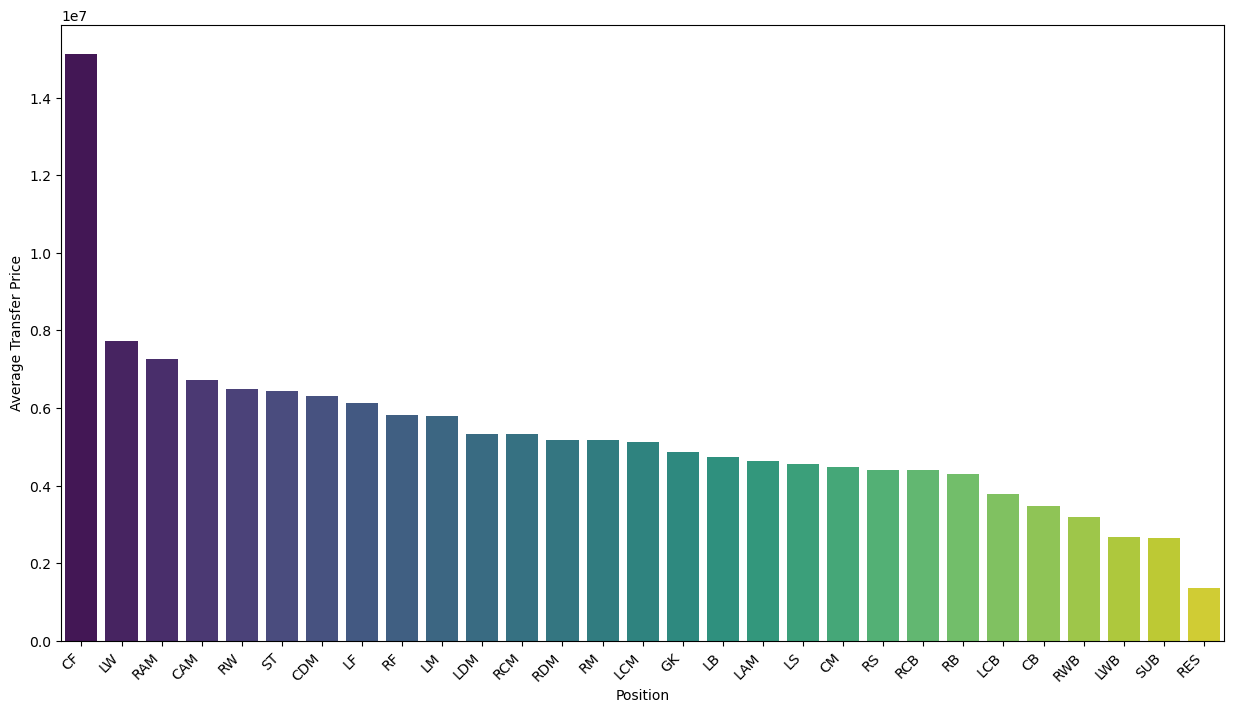

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
position_avg_prices = df.groupby('Position')['Transfer Cost'].mean().reset_index()

# Sort the table by average transfer price in descending order
position_avg_prices = position_avg_prices.sort_values(by='Transfer Cost', ascending=False)

# Plot the average transfer prices using a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Position', y='Transfer Cost', data=position_avg_prices, palette='viridis')
#plt.title('Average Transfer Price by Position')
plt.xlabel('Position')
plt.ylabel('Average Transfer Price')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()


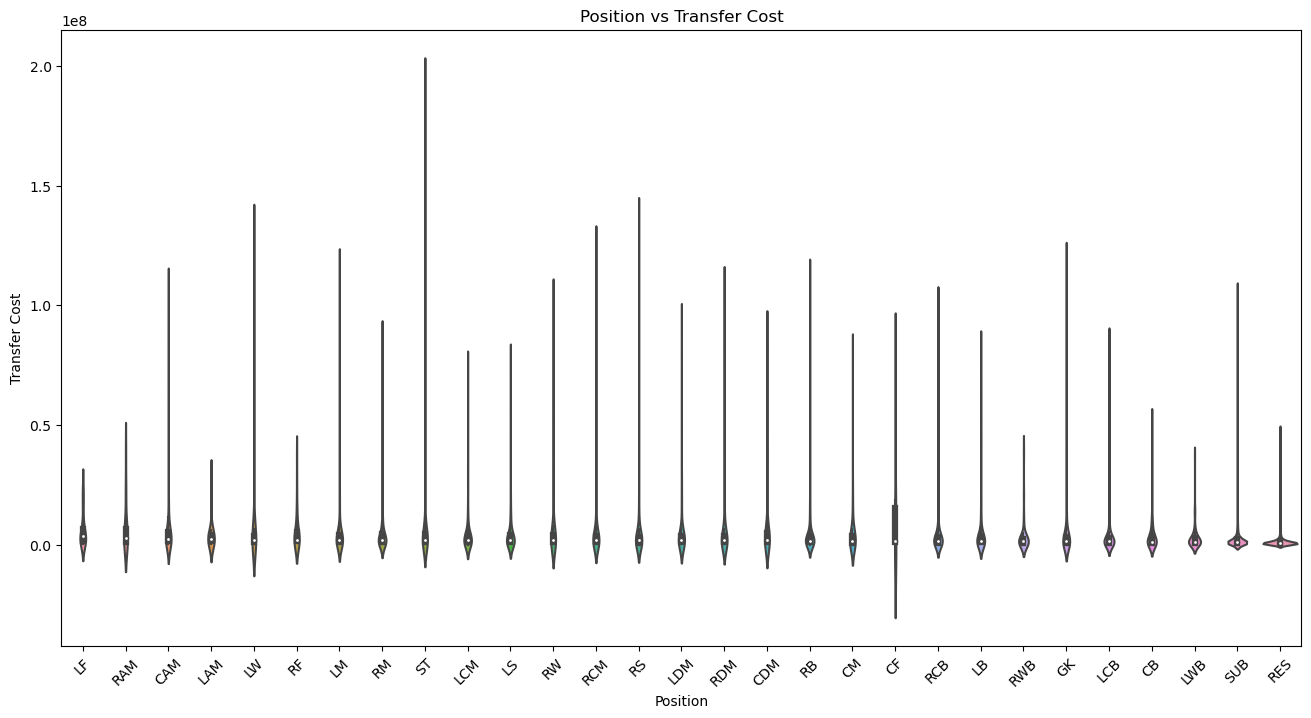

In [ ]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='Position', y='Transfer Cost', data=df, order=df.groupby('Position')['Transfer Cost'].median().sort_values(ascending=False).index)
plt.title('Position vs Transfer Cost')
plt.xticks(rotation=45)
plt.show()


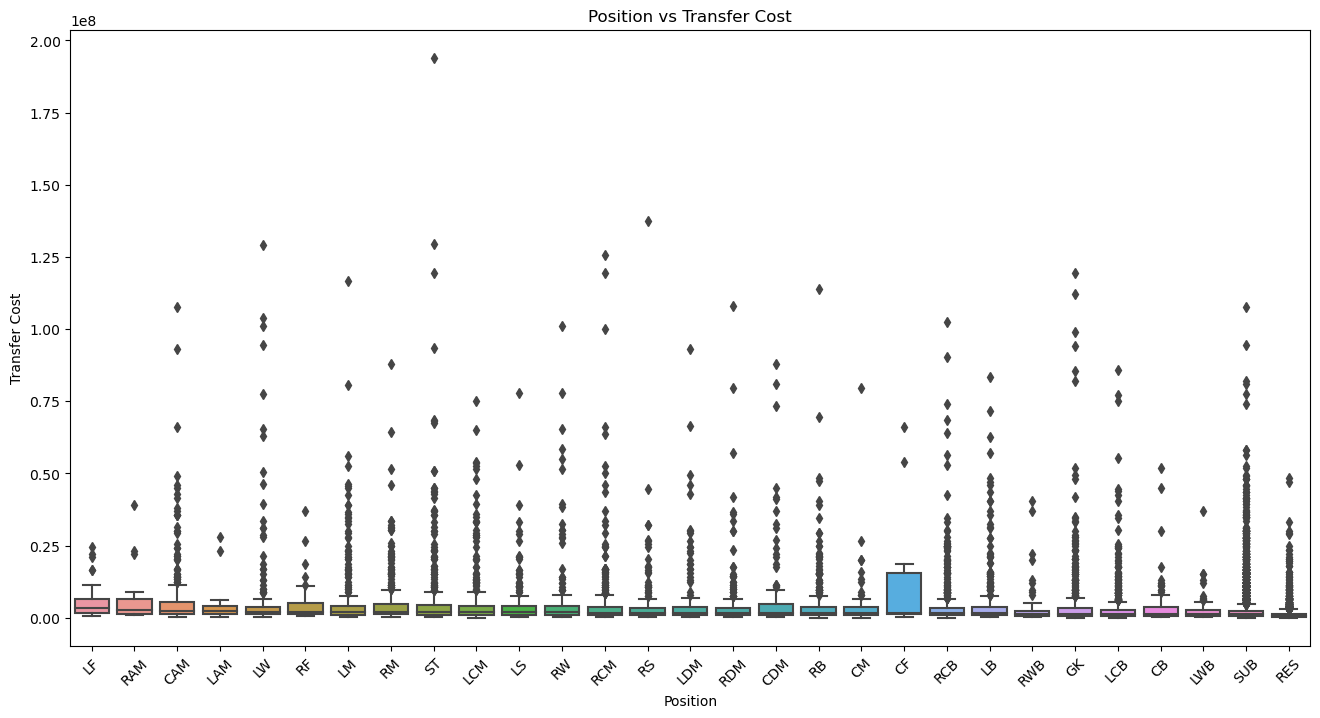

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Position', y='Transfer Cost', data=df, order=df.groupby('Position')['Transfer Cost'].median().sort_values(ascending=False).index)
plt.title('Position vs Transfer Cost')
plt.xticks(rotation=45)
plt.show()


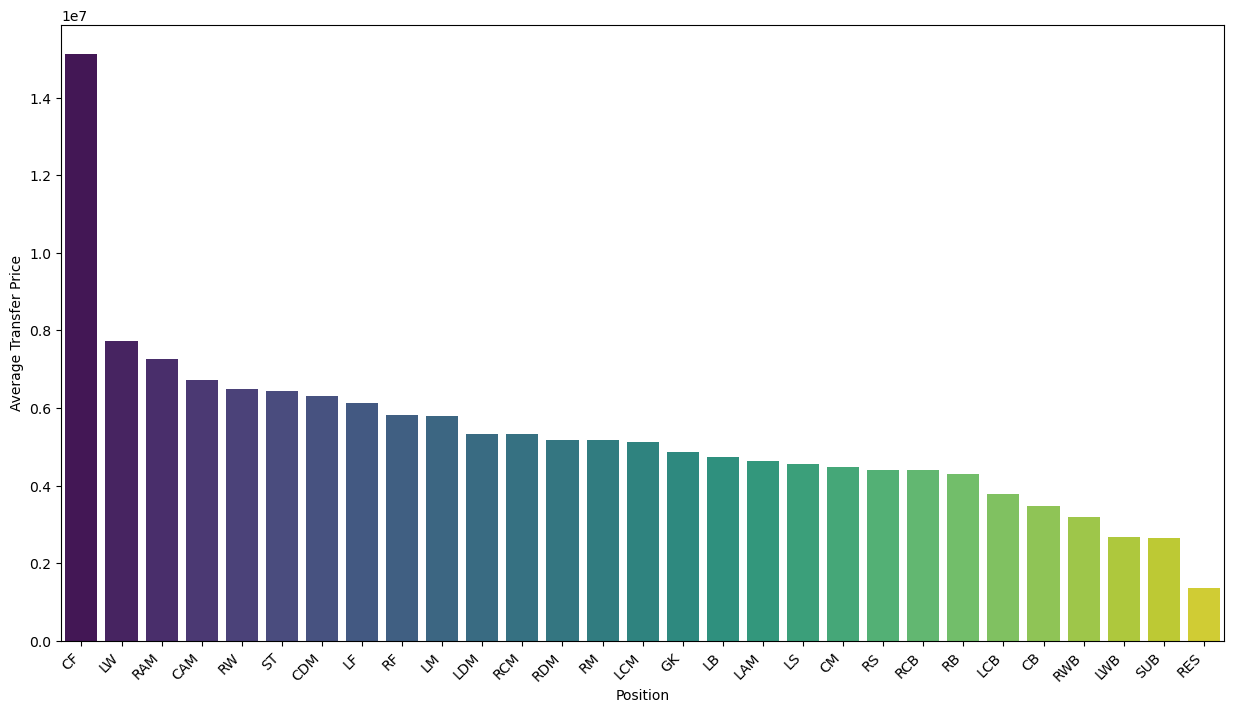

Unique Positions: ['CAM' 'LDM' 'RS' 'RCM' 'LB' 'RDM' 'LCM' 'SUB' 'LS' 'RM' 'LCB' 'LM' 'RB'
 'CDM' 'RW' 'LW' 'ST' 'CM' 'RF' 'LWB' 'RAM' 'CF' 'RES' 'LF' 'RWB' 'CB'
 'RCB' 'LAM' 'GK']


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
position_avg_prices = df.groupby('Position')['Transfer Cost'].mean().reset_index()

# Get unique positions
unique_positions = df['Position'].unique()

# Sort the table by average transfer price in descending order
position_avg_prices = position_avg_prices.sort_values(by='Transfer Cost', ascending=False)

# Plot the average transfer prices using a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Position', y='Transfer Cost', data=position_avg_prices, palette='viridis')
#plt.title('Average Transfer Price by Position')
plt.xlabel('Position')
plt.ylabel('Average Transfer Price')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

# Display unique positions
print("Unique Positions:", unique_positions)


In [25]:
import plotly.express as px
import numpy as np

# Assuming df is your DataFrame
categories = df['Position'].unique()

fig = px.line_polar(df, r='Transfer Cost', theta='Position', line_close=True, color='Position',
                    category_orders={'Position': categories},
                    title='',
                    width=800, height=600, color_discrete_sequence=px.colors.qualitative.Set1)

# Hard code the full form and abbreviations for legend
legend_labels = [('Central Attacking Midfielder', 'CAM'),
                 ('Left Defensive Midfielder', 'LDM'),
                 ('Right Striker', 'RS'),
                 ('Right Central Midfielder', 'RCM'),
                 ('Left Back', 'LB'),
                 ('Right Defensive Midfielder', 'RDM'),
                 ('Left Central Midfielder', 'LCM'),
                 ('Substitute', 'SUB'),
                 ('Left Striker', 'LS'),
                 ('Right Midfielder', 'RM'),
                 ('Left Center Back', 'LCB'),
                 ('Left Midfielder', 'LM'),
                 ('Right Back', 'RB'),
                 ('Central Defensive Midfielder', 'CDM'),
                 ('Right Winger', 'RW'),
                 ('Left Winger', 'LW'),
                 ('Striker', 'ST'),
                 ('Central Midfielder', 'CM'),
                 ('Right Forward', 'RF'),
                 ('Left Wing Back', 'LWB'),
                 ('Right Attacking Midfielder', 'RAM'),
                 ('Center Forward', 'CF'),
                 ('Reserve', 'RES'),
                 ('Left Forward', 'LF'),
                 ('Right Wing Back', 'RWB'),
                 ('Center Back', 'CB'),
                 ('Right Center Back', 'RCB'),
                 ('Left Attacking Midfielder', 'LAM'),
                 ('Goalkeeper', 'GK')]

# Remove legend and hover functionality
fig.update_layout(showlegend=False)
fig.update_traces(hoverinfo='none')

# Update names of traces directly
for i, (full, abbrev) in enumerate(legend_labels):
    fig.update_traces(selector=dict(name=f'{abbrev}'), name=f'{full} ({abbrev})')
fig.update_layout(showlegend=True)
fig.show()


c:\Users\abish\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\abish\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\abish\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\abish\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\abish\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve